In [1]:
# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

# modelling
import statsmodels.formula.api as smf

# statistics 
import scipy.stats as stats

import seaborn as sns

from sklearn.preprocessing import StandardScaler

## Import Data

In [2]:
#import data

data = pd.read_csv('stat_test.csv')
data

,Unnamed: 0,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,8.5,196
1,1,COMPACT,2.4,4,Manual,Premium Gasoline,9.6,221
2,2,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,5.9,136
3,3,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,11.1,255
4,4,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,10.6,244
...,...,...,...,...,...,...,...,...
6276,7380,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,9.4,219
6277,7381,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,232
6278,7382,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,10.3,240
6279,7383,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,232


In [3]:
#rename nama kolom
data.rename(columns = {'Vehicle Class':'vehicle_class', 'Engine Size(L)':'engine_size',
                              'Cylinders':'cylinders', 'Fuel Consumption Comb (L/100 km)' : 'fuel_con',
                               'Fuel Type' : 'fuel_type' , 'Transmission' : 'transmission' ,
                               'CO2 Emissions(g/km)' : 'co2_emission'}, inplace = True)

In [4]:
data.head()

,Unnamed: 0,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_con,co2_emission
0,0,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,8.5,196
1,1,COMPACT,2.4,4,Manual,Premium Gasoline,9.6,221
2,2,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,5.9,136
3,3,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,11.1,255
4,4,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,10.6,244


In [5]:
vehicle_emission = data[['vehicle_class', 'co2_emission']]

In [6]:
vehicle_emission.head()

,vehicle_class,co2_emission
0,COMPACT,196
1,COMPACT,221
2,COMPACT,136
3,SUV - SMALL,255
4,SUV - SMALL,244


In [7]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

## Single Predictor Linear Regression

#### Untransformed

In [8]:
#OLS model fit dengan vehicle class sebagai predictor

# Create OLS model object
model = smf.ols("co2_emission ~ vehicle_class", vehicle_emission)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_co2_emission = print_coef_std_err(results)

In [9]:
#koefisien dan standard error

results_co2_emission

,coef,std err
Intercept,217.641196,1.578789
vehicle_class[T.FULL-SIZE],46.766284,2.631211
vehicle_class[T.MID-SIZE],4.661248,2.187378
vehicle_class[T.MINICOMPACT],19.033986,3.272178
vehicle_class[T.MINIVAN],43.473558,6.276211
vehicle_class[T.PICKUP TRUCK - SMALL],59.381360,4.406340
vehicle_class[T.PICKUP TRUCK - STANDARD],83.969330,2.689068
vehicle_class[T.SPECIAL PURPOSE VEHICLE],20.174189,6.092632
vehicle_class[T.STATION WAGON - MID-SIZE],23.114360,7.246393
vehicle_class[T.STATION WAGON - SMALL],-14.954280,3.606979


In [22]:
#performa r-squared single-predictor tidak ditransform

results.rsquared

0.3613139244860284

In [10]:
# Use LabelEncoder to convert the vehicle class variable into numeric
from sklearn.preprocessing import LabelEncoder

vehicle_transform = vehicle_emission.copy()

# Create LabelEncoder Object and transform the vehicle classvariable

vehicle_transform["vehicle_class"] = LabelEncoder().fit_transform(data["vehicle_class"])
# Display the 5th first row after transforming
vehicle_transform[["vehicle_class","co2_emission"]].head()

,vehicle_class,co2_emission
0,0,196
1,0,221
2,0,136
3,11,255
4,11,244


#### Transformed

In [23]:
#OLS model fit dengan vehicle class sebagai predictor

# Create OLS model object
model2 = smf.ols("co2_emission ~ vehicle_class", vehicle_transform)

# Fit the model
results2 = model2.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results2_co2_emission = print_coef_std_err(results2)

In [24]:
#koefisien dan standard error
results2_co2_emission

,coef,std err
Intercept,227.772603,1.177440
vehicle_class,3.691743,0.147813


In [25]:
#performance r-squared

results2.rsquared

0.09036814431913187

# Multiple Predictors

In [52]:
#transform  data kategorikal fuel type
# Create LabelEncoder Object and transform the fuel type variable

multiple = data.copy()
multiple["fuel_type"] = LabelEncoder().fit_transform(data["fuel_type"])


# Display the 5th first row after transforming
multiple[["engine_size", "fuel_type","co2_emission"]].head()

,engine_size,fuel_type,co2_emission
0,2.0,2,196
1,2.4,2,221
2,1.5,2,136
3,3.5,2,255
4,3.5,2,244


## Interaction (-) and Standardization (-)

In [53]:
#Tanpa interaksi dan tanpa standardisasi

# Create OLS model object
model3 = smf.ols("co2_emission ~  engine_size  + fuel_type" , multiple)

# Fit the model
results3 = model3.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results3_co2_emission = print_coef_std_err(results3)


In [54]:
#koefisien dan standard erroor
results3_co2_emission

,coef,std err
Intercept,141.009450,1.814234
engine_size,36.867163,0.289100
fuel_type,-2.688232,0.568389


In [56]:
# performance: r-square
results3.rsquared

0.731757896106425

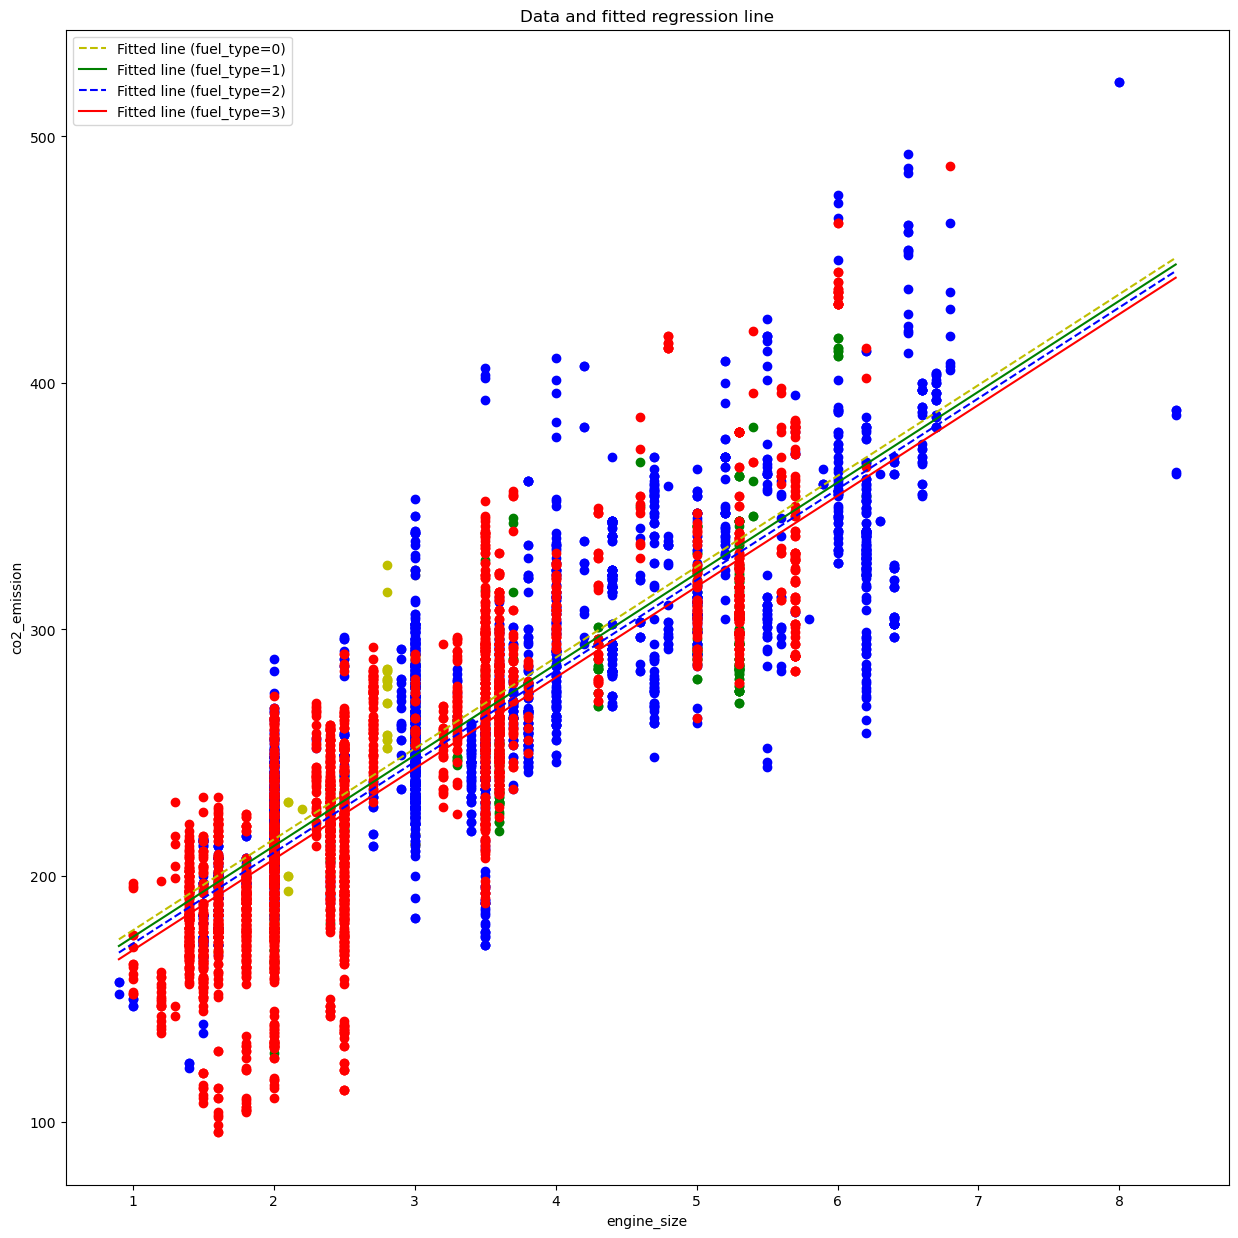

In [55]:
# data and fitted regression line

predictors = ["engine_size","fuel_type"]
outcome = "co2_emission"
data = multiple.copy()
results_ = results3_co2_emission.copy()
linestyles = {0 : "--", 1: "-", 2 : "--", 3: "-"}
c = {0 : "y", 1: "g", 2 : "b", 3: "r"}
markers = {0 : "o", 1: "o", 2 : "o", 3: "o"}

plt.figure(figsize=(15, 15))

# Plot the data
for i in range(4):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], 
                marker = markers[i])

# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]


# y_hat = beta_0_hat + \beta_1_hat * mom_hs + \beta_2_hat * mom_iq
fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(4)]


# Plot two fitted line
for i in range(4):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (fuel_type={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

## Interaction (-) | Standardization (+)

In [57]:
#Standarisasi
scale_engine = multiple['engine_size']

multiple["engine_size_s"] = (scale_engine -np.mean(scale_engine)) / (np.std(scale_engine))

In [58]:
# Create OLS model object
model4 = smf.ols("co2_emission ~ engine_size_s + fuel_type", multiple)

# Fit the model
results4 = model4.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results4_co2_emission = print_coef_std_err(results4)

#koefisien dan standard error
results4_co2_emission

,coef,std err
Intercept,257.573899,1.409639
engine_size_s,50.330687,0.394677
fuel_type,-2.688232,0.568389


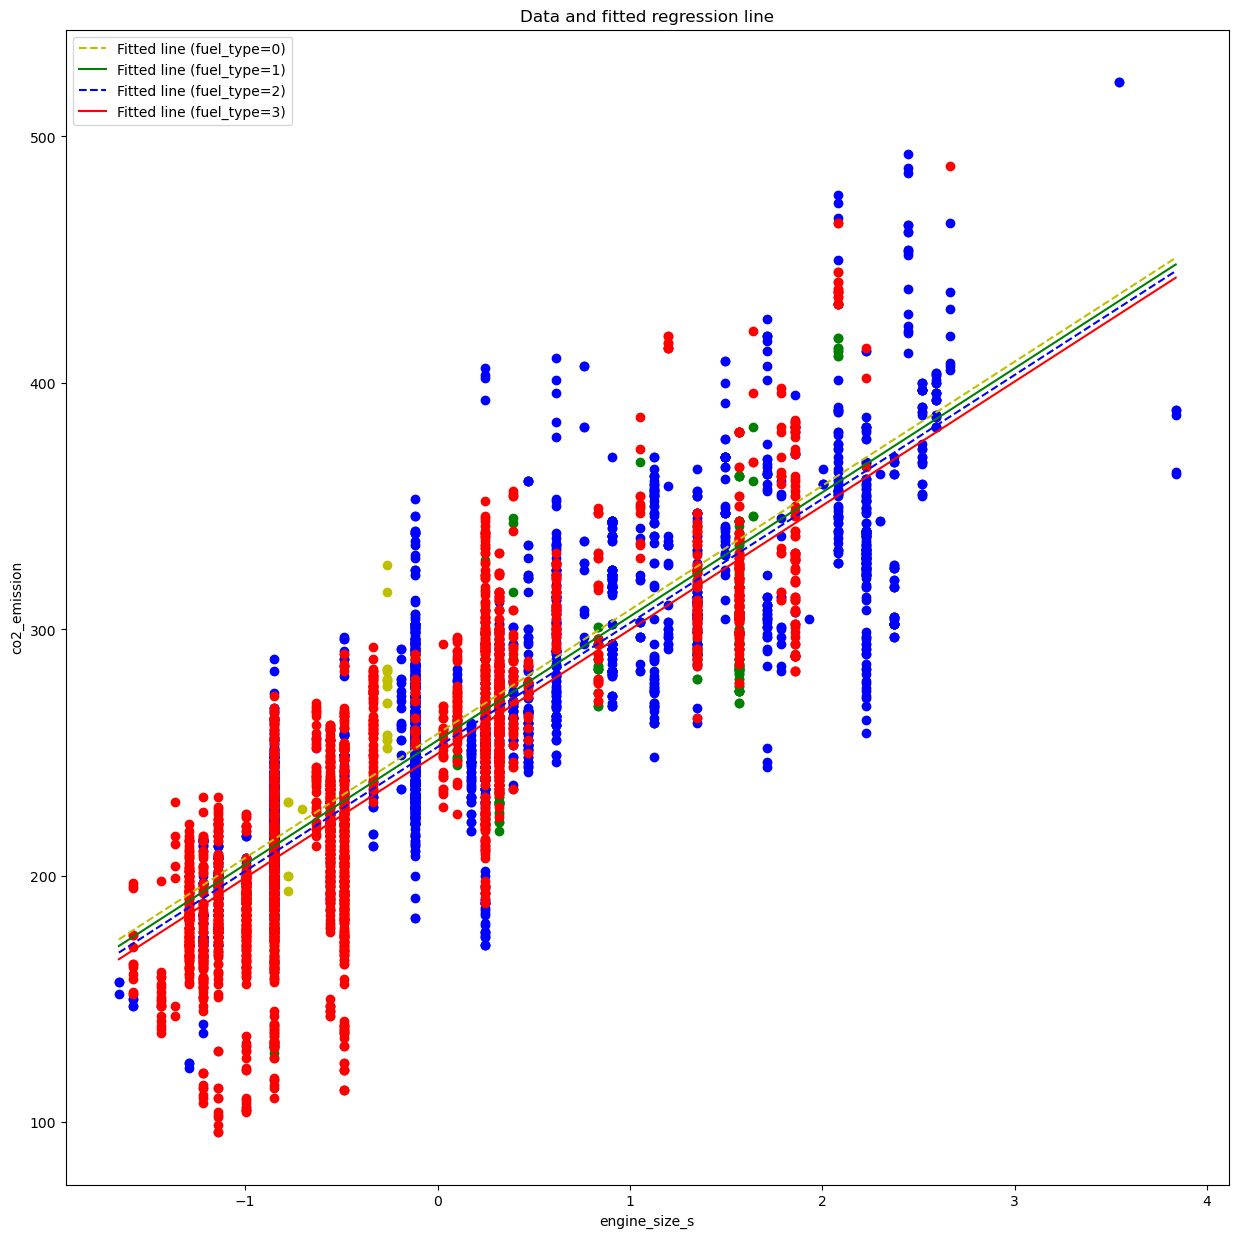

In [59]:
predictors = ["engine_size_s","fuel_type"]
outcome = "co2_emission"
data = multiple.copy()
results_ = results4_co2_emission.copy()
linestyles = {0 : "--", 1: "-", 2 : "--", 3: "-"}
c = {0 : "y", 1: "g", 2 : "b", 3: "r"}
markers = {0 : "o", 1: "o", 2 : "o", 3: "o"}

plt.figure(figsize=(15, 15))

# Plot the data
for i in range(4):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], 
                marker = markers[i])

# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]


# y_hat = beta_0_hat + \beta_1_hat * mom_hs + \beta_2_hat * mom_iq
fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i for i in range(4)]


# Plot two fitted line
for i in range(4):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (fuel_type={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [60]:
#performance r-squared

results4.rsquared

0.731757896106425

## Interaction (+) | Standardization (-)

In [61]:
#ols model fitting dengan predictor engine size, fuel type dan interaksi antar engine size dan fuel type

# Create OLS model object
model5 = smf.ols("co2_emission ~  engine_size  + fuel_type + engine_size:fuel_type" , multiple)

# Fit the model
results5 = model5.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results5_co2_emission = print_coef_std_err(results5)


In [63]:
#koefisen dan standard error

results5_co2_emission

,coef,std err
Intercept,180.101853,3.790673
engine_size,24.480229,1.095923
fuel_type,-19.171293,1.515938
engine_size:fuel_type,5.350118,0.456942


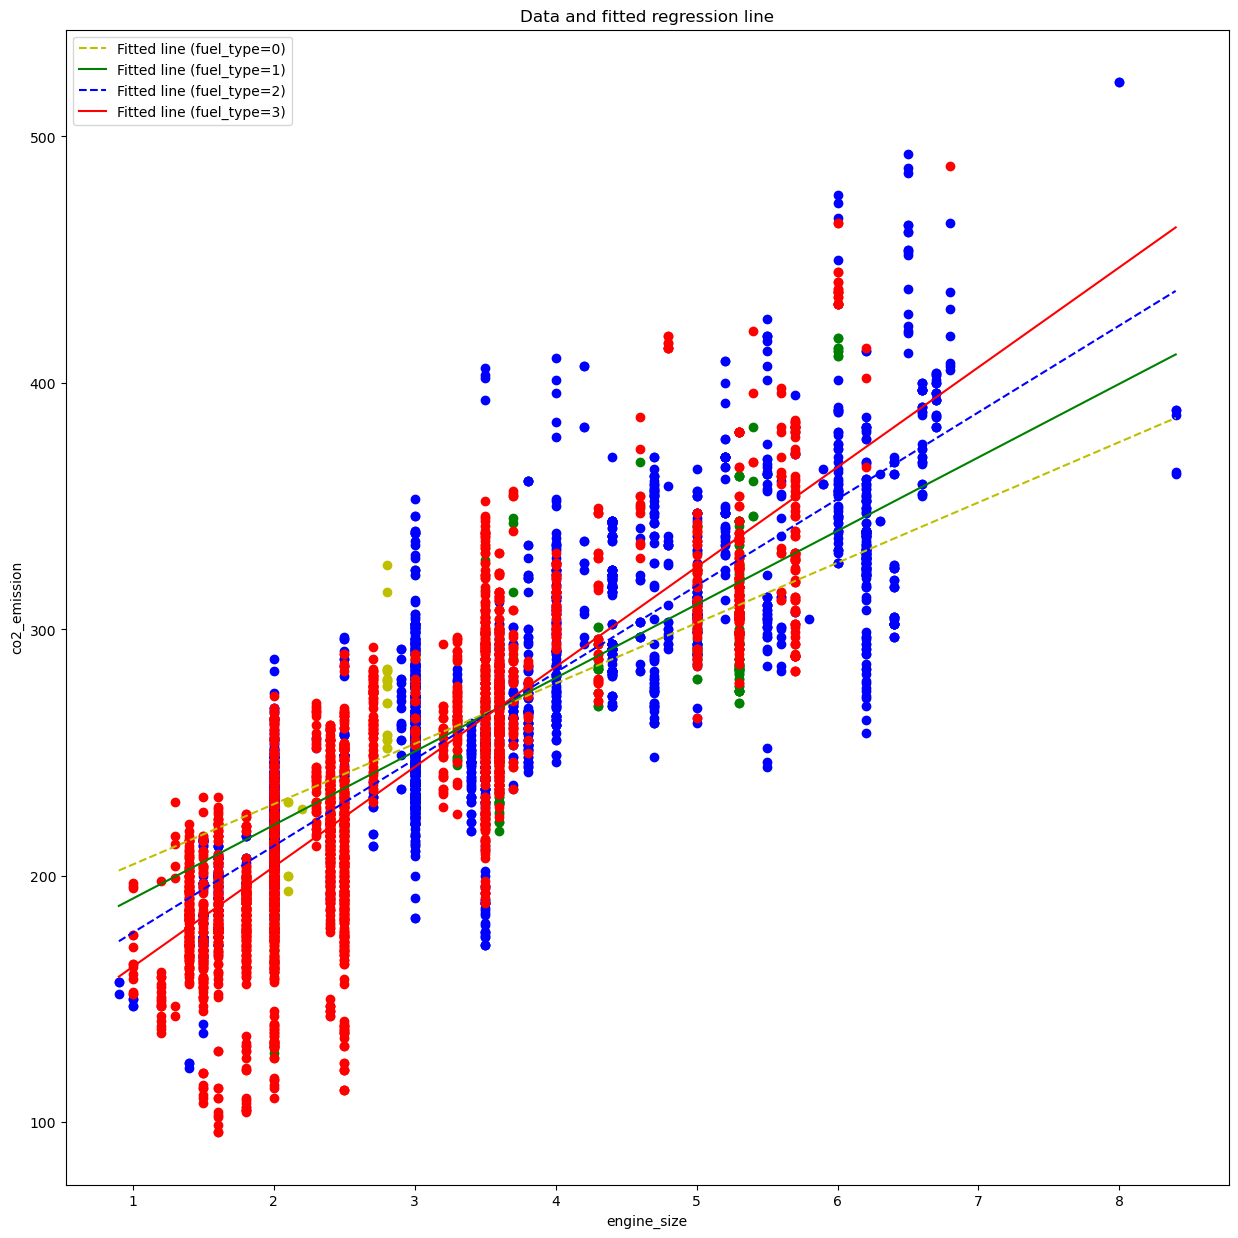

In [64]:
#data and fitted regression line

predictors = ["engine_size","fuel_type", "engine_size:fuel_type"]
outcome = "co2_emission"
data = multiple.copy()
results_ = results5_co2_emission.copy()
linestyles = {0 : "--", 1: "-", 2 : "--", 3: "-"}
c = {0 : "y", 1: "g", 2 : "b", 3: "r"}
markers = {0 : "o", 1: "o", 2 : "o", 3: "o"}

plt.figure(figsize=(15, 15))

# Plot the data
for i in range(4):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], 
                marker = markers[i])

# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

# y_hat = beta_0_hat + \beta_1_hat * mom_hs + \beta_2_hat * mom_iq
fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(4)]


# Plot two fitted line
for i in range(4):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (fuel_type={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [66]:
#performance r-squared

results5.rsquared

0.7374910768563718

## Interaction (+) | Standardization (+)

In [67]:
#ols model fitting dengan predictor engine size, fuel type dan interaksi antar engine size dan fuel type
# Create OLS model object
model6 = smf.ols("co2_emission ~ engine_size_s + fuel_type + engine_size_s:fuel_type", multiple)

# Fit the model
results6 = model6.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results6_co2_emission = print_coef_std_err(results6)

#koefisien dan standard error
results6_co2_emission

,coef,std err
Intercept,257.502016,1.394618
engine_size_s,33.420167,1.496143
fuel_type,-2.255602,0.563539
engine_size_s:fuel_type,7.303928,0.623813


In [68]:
#performance r-squared

results6.rsquared

0.7374910768563718

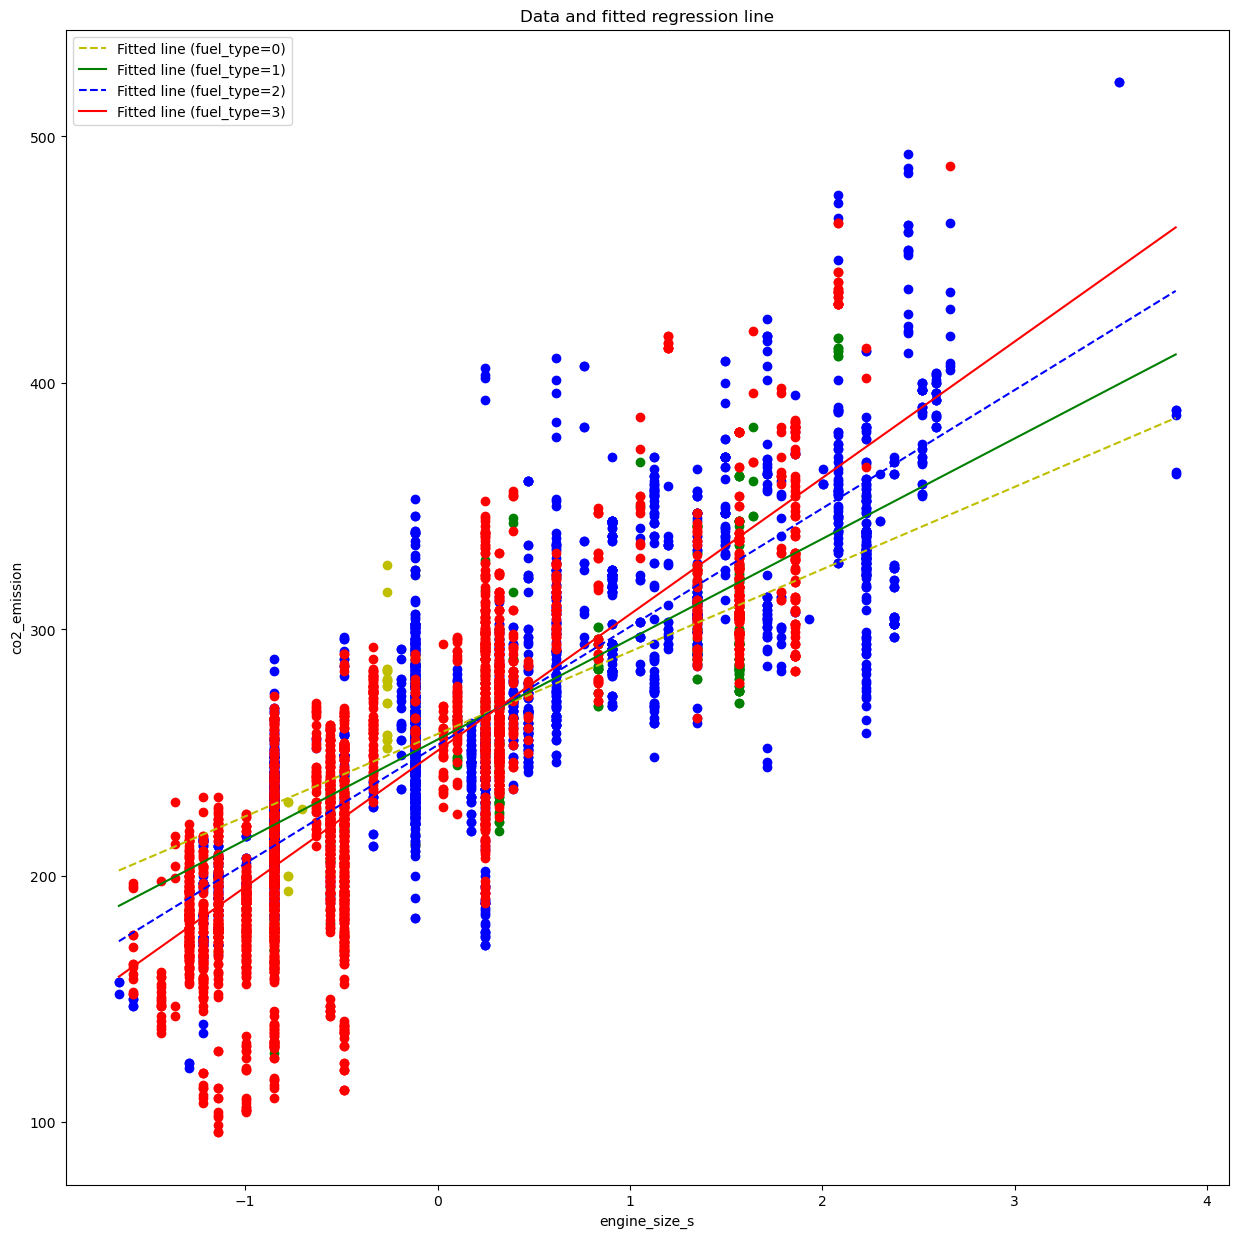

In [70]:
#data and fitted regression line

predictors = ["engine_size_s","fuel_type", "engine_size_s:fuel_type"]
outcome = "co2_emission"
data = multiple.copy()
results_ = results6_co2_emission.copy()
linestyles = {0 : "--", 1: "-", 2 : "--", 3: "-"}
c = {0 : "y", 1: "g", 2 : "b", 3: "r"}
markers = {0 : "o", 1: "o", 2 : "o", 3: "o"}

plt.figure(figsize=(15, 15))

# Plot the data
for i in range(4):
    plt.scatter(data[data[predictors[1]]==i][predictors[0]], data[data[predictors[1]]==i][outcome], 
                color = c[i], 
                marker = markers[i])

# x value as mom_iq predictors value
x_domain = np.linspace(np.min(data[predictors[0]]), np.max(data[predictors[0]]), 100)


# Calculate the fitted values for two lines regarding the mom_hs (0 and 1)
beta0_hat = results_.loc["Intercept"]["coef"]
beta1_hat = results_.loc[predictors[0]]["coef"]
beta2_hat = results_.loc[predictors[1]]["coef"]
beta3_hat = results_.loc[predictors[2]]["coef"]

# y_hat = beta_0_hat + \beta_1_hat * mom_hs + \beta_2_hat * mom_iq
fitted_values = [beta0_hat +  beta1_hat * x_domain  + beta2_hat * i + beta3_hat * i * x_domain for i in range(4)]


# Plot two fitted line
for i in range(4):
    plt.plot(x_domain, fitted_values[i], c = c[i], label = f"Fitted line (fuel_type={i})", linestyle = linestyles[i])

# Add a legend and labels
plt.legend()
plt.ylabel(f"{outcome}")
plt.xlabel(f"{predictors[0]}")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

In [84]:
multiple['engine_size'].min(), multiple['engine_size'].max()

(0.9, 8.4)

In [86]:
multiple['engine_size_s'].min(), multiple['engine_size_s'].max()

(-1.6567229134834798, 3.837017382653576)